Testing some 2D slices of 3D plots

In [1]:
include("src/QuadIFS.jl")
using .QuadIFS, Plots;

In [2]:
ρ = 0.41
IFS = [
    Similarity(ρ,[0,0])
    Similarity(ρ,[1-ρ,0])
    Similarity(ρ,[(1-ρ)/2,sqrt(3)*(1-ρ)/2])
    Similarity(ρ,[(1-ρ)/2,(1-ρ)/(2*sqrt(3))])
];

4-element Array{Similarity,1}:
 Similarity(0.41, [0, 0], [1.0 0.0; 0.0 1.0])                                    
 Similarity(0.41, [0.5900000000000001, 0.0], [1.0 0.0; 0.0 1.0])                 
 Similarity(0.41, [0.29500000000000004, 0.5109549882328188], [1.0 0.0; 0.0 1.0]) 
 Similarity(0.41, [0.29500000000000004, 0.17031832941093963], [1.0 0.0; 0.0 1.0])

In [3]:
Γ = Attractor(IFS)#CantorDust()
k = 10.0
d = [1 1 -1]/sqrt(3)
S = SingleLayer(Γ, k)
Sh = DiscreteBIO(S,0.05,0.01)
f(x) = exp(im*k*(d[1:2]'*x))
ϕ = Sh\f;

Constructing BEM system 100%|███████████████████████████| Time: 0:00:18


In [7]:
uⁱ(x) = exp.(im*k*(x*d'))[:]

uⁱ (generic function with 1 method)

In [16]:
h=0.01 # adujust this for more acurate / faster plots
z_val = -0.05
x_1 = [j for j=-1:h:2]
x_2 = [j for j=-1:h:2]
X_1 = repeat(x_1, outer=(1,length(x_2)))
X_2 = copy(transpose(repeat(x_2, outer=(1,length(x_1)))))
N = length(x_1)*length(x_2)
X = [reshape(X_1, (N,)) reshape(X_2, (N,)) z_val*ones(Float64,N)]
uˢ = - single_layer_potential(Γ,k,ϕ,X)
uᵗ = uⁱ(X) - uˢ
vals = reshape(uᵗ,(length(x_1),length(x_2)));

In [17]:
typeof(uⁱ(X))

Array{Complex{Float64},2}

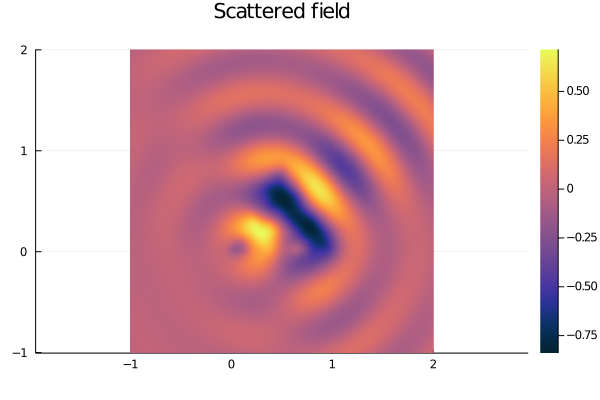

In [6]:
heatmap(x_1,x_2,transpose(real(uˢ)),  aspect_ratio = 1, 
    title="Scattered field", legend=true, c = :thermal)

In [ ]:
heatmap(x_1,x_2,transpose(real(vals)),  aspect_ratio = 1, 
    title="Total field", legend=true, c = :thermal)

In [ ]:
using PlotlyJS

function mesh_box(l,w,h,x,y,z)
    PlotlyJS.mesh3d(
        x = [x, x+l, x,   x+l, x,   x+l, x,   x+l],
        y = [y, y,   y+w, y+w, y,   y,   y+w, y+w],
        z = [z, z,   z,   z,   z+h, z+h, z+h, z+h],
        i = [0, 0, 0, 0, 0, 0, 7, 7, 7, 7, 7, 7],
        j = [3, 3, 5, 5, 6, 6, 3, 3, 5, 5, 6, 6],
        k = [1, 2, 1, 4, 2, 4, 1, 2, 1, 4, 2, 4],
        color = "rgb(200,100,100)",
    )
end

PlotlyJS.plot(
    mesh_box(1,1,1,0,0,0)
)